In [1]:
import numpy as np 
from numpy import dtype
import time
import pandas as pd 
import utils
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

%matplotlib inline

from collections import OrderedDict

%matplotlib inline


In [2]:
dtypes = {
 'Dst Port': dtype('int64'),
 'Protocol': dtype('int64'),
 'Flow Duration': dtype('int64'),
 'Tot Fwd Pkts': dtype('int64'),
 'Tot Bwd Pkts': dtype('int64'),
 'TotLen Fwd Pkts': dtype('float64'),
 'TotLen Bwd Pkts': dtype('float64'),
 'Fwd Pkt Len Max': dtype('float64'),
 'Fwd Pkt Len Min': dtype('float64'),
 'Fwd Pkt Len Mean': dtype('float64'),
 'Fwd Pkt Len Std': dtype('float64'),
 'Bwd Pkt Len Max': dtype('float64'),
 'Bwd Pkt Len Min': dtype('float64'),
 'Bwd Pkt Len Mean': dtype('float64'),
 'Bwd Pkt Len Std': dtype('float64'),
 'Flow Byts/s': dtype('float64'),
 'Flow Pkts/s': dtype('float64'),
 'Flow IAT Mean': dtype('float64'),
 'Flow IAT Std': dtype('float64'),
 'Flow IAT Max': dtype('float64'),
 'Flow IAT Min': dtype('float64'),
 'Fwd IAT Tot': dtype('float64'),
 'Fwd IAT Mean': dtype('float64'),
 'Fwd IAT Std': dtype('float64'),
 'Fwd IAT Max': dtype('float64'),
 'Fwd IAT Min': dtype('float64'),
 'Bwd IAT Tot': dtype('float64'),
 'Bwd IAT Mean': dtype('float64'),
 'Bwd IAT Std': dtype('float64'),
 'Bwd IAT Max': dtype('float64'),
 'Bwd IAT Min': dtype('float64'),
 'Fwd PSH Flags': dtype('int64'),
 'Bwd PSH Flags': dtype('int64'),
 'Fwd URG Flags': dtype('int64'),
 'Bwd URG Flags': dtype('int64'),
 'Fwd Header Len': dtype('int64'),
 'Bwd Header Len': dtype('int64'),
 'Fwd Pkts/s': dtype('float64'),
 'Bwd Pkts/s': dtype('float64'),
 'Pkt Len Min': dtype('float64'),
 'Pkt Len Max': dtype('float64'),
 'Pkt Len Mean': dtype('float64'),
 'Pkt Len Std': dtype('float64'),
 'Pkt Len Var': dtype('float64'),
 'FIN Flag Cnt': dtype('int64'),
 'SYN Flag Cnt': dtype('int64'),
 'RST Flag Cnt': dtype('int64'),
 'PSH Flag Cnt': dtype('int64'),
 'ACK Flag Cnt': dtype('int64'),
 'URG Flag Cnt': dtype('int64'),
 'CWE Flag Count': dtype('int64'),
 'ECE Flag Cnt': dtype('int64'),
 'Down/Up Ratio': dtype('float64'),
 'Pkt Size Avg': dtype('float64'),
 'Fwd Seg Size Avg': dtype('float64'),
 'Bwd Seg Size Avg': dtype('float64'),
 'Fwd Byts/b Avg': dtype('float64'),
 'Fwd Pkts/b Avg': dtype('float64'),
 'Fwd Blk Rate Avg': dtype('float64'),
 'Bwd Byts/b Avg': dtype('float64'),
 'Bwd Pkts/b Avg': dtype('float64'),
 'Bwd Blk Rate Avg': dtype('float64'),
 'Subflow Fwd Pkts': dtype('int64'),
 'Subflow Fwd Byts': dtype('int64'),
 'Subflow Bwd Pkts': dtype('int64'),
 'Subflow Bwd Byts': dtype('int64'),
 'Init Fwd Win Byts': dtype('int64'),
 'Init Bwd Win Byts': dtype('int64'),
 'Fwd Act Data Pkts': dtype('int64'),
 'Fwd Seg Size Min': dtype('int64'),
 'Active Mean': dtype('float64'),
 'Active Std': dtype('float64'),
 'Active Max': dtype('float64'),
 'Active Min': dtype('float64'),
 'Idle Mean': dtype('float64'),
 'Idle Std': dtype('float64'),
 'Idle Max': dtype('float64'),
 'Idle Min': dtype('float64'),
 'Label': dtype('O')
 }

classes_to_id = {'Benign': 0,'DDoS attacks-LOIC-HTTP': 1, 'DDOS attack-HOIC': 2,'DDOS attack-LOIC-UDP': 3,'DoS attacks-SlowHTTPTest': 4,'DoS attacks-Hulk': 5,'Bot': 6,'FTP-BruteForce': 7,'SSH-Bruteforce': 8,'Infilteration': 9,'DoS attacks-GoldenEye': 10,'DoS attacks-Slowloris': 11}

classes = OrderedDict(classes_to_id)
classes = list(classes.keys())

#The inf values are replaced with nan values, subsequently imputing all nan values of those columns with the mean of the columns. 

def replace_infinity_with_mean(df):
    inf_columns = [c for c in df.columns if df[df[c] == np.inf][c].count()>0]
    for col in inf_columns:
        df[col].replace([np.inf, -np.inf], np.nan, inplace =True)
        mean = df[col].mean()
        df[col].fillna(mean, inplace=True)
    return df 

def replace_negative_values_with_mean(df):
    numeric_cols = df.select_dtypes(include = [np.number]).columns.values 
    columns = [c for c in numeric_cols if df[df[c]<0][c].count()>0]
    for col in columns: 
        mask = df[col]<0
        df.loc[mask,col] = np.nan
        mean = df[col].mean()
        df[col].fillna(mean,inplace=True)
    return df

def preprocessing(df): 
    df = replace_infinity_with_mean(df)
    df = replace_negative_values_with_mean(df)
    
    df = df.drop('Timestamp', axis = 1)
    df['Label'] = df['Label'].apply(lambda x: classes_to_id[x])
    return df 



In [3]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
df_train = utils.read_base_dataset("shuff1000train")
df_test = utils.read_base_dataset("shuff1000test")

print(df_train.shape)
print(df_test.shape)

df_train = preprocessing(df_train)
df_test = preprocessing(df_test)

x_train = df_train.drop(columns = ['Label'])
y_train = df_train['Label']

x_test = df_test.drop(columns = ['Label'])
y_test = df_test['Label']

#print("Predictions: " ,y_pred)


(8400, 80)
(3600, 80)


## SGD Classifier

(8400, 78)
(3600, 78)


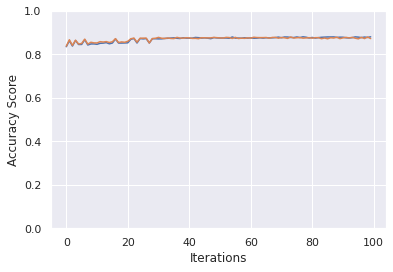

In [4]:



numlabels = list(classes_to_id.values())
ITERATIONS = 100
iterations = range(ITERATIONS)
scores = np.empty((ITERATIONS,2))

scaler = StandardScaler()
sgd = SGDClassifier(random_state=42)

x_train_sca = scaler.fit_transform(x_train)
x_test_sca = scaler.transform(x_test)

# x_train_sca = x_train
# x_test_sca = x_test

print(x_train_sca.shape)
print(x_test_sca.shape)
for epoch in iterations:
    sgd.partial_fit(x_train_sca, y_train, classes=numlabels)
    scores[epoch,0], scores[epoch,1] = sgd.score(x_train_sca, y_train), sgd.score(x_test_sca, y_test)


ax = plt.subplot(1, 1, 1)
sns.lineplot(x=iterations, y=scores[:,0], ax=ax)
sns.lineplot(x=iterations, y=scores[:,1], ax=ax)

ax.set(xlabel='Iterations', ylabel='Accuracy Score', ylim=(0, 1))


plt.show()

## Random Forest with NUM_ESTIMATORS

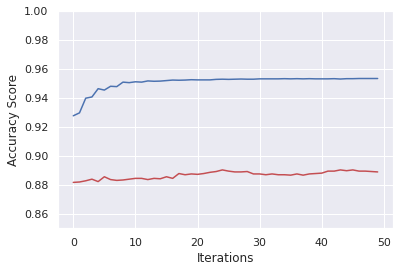

Last Test Accuracy using Random Forest with 50 estimators: 0.8888888888888888


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline


NUM_ESTIMATORS = 50
estimators = range(0, NUM_ESTIMATORS)
scores = np.empty((NUM_ESTIMATORS,2))

for num in estimators:
    pipe = Pipeline([('scaler', StandardScaler()), ('rfc', RandomForestClassifier(n_estimators=num+1, random_state=42))])
    pipe.fit(x_train, y_train)
    scores[num,0], scores[num,1] = pipe.score(x_train, y_train), pipe.score(x_test, y_test)


ax = plt.subplot(1, 1, 1)
sns.lineplot(x=estimators, y=scores[:,0], ax=ax)
sns.lineplot(x=estimators, y=scores[:,1], ax=ax, color='r')

ax.set(xlabel='Iterations', ylabel='Accuracy Score', ylim=(0.85, 1))


plt.show()
print(f"Last Test Accuracy using Random Forest with {NUM_ESTIMATORS} estimators: {pipe.score(x_test, y_test)}")

## Confusion Matrix

                          precision    recall  f1-score   support

                  Benign       0.67      0.66      0.66       300
  DDoS attacks-LOIC-HTTP       1.00      1.00      1.00       300
        DDOS attack-HOIC       0.99      1.00      1.00       300
    DDOS attack-LOIC-UDP       1.00      1.00      1.00       300
DoS attacks-SlowHTTPTest       0.61      0.97      0.75       300
        DoS attacks-Hulk       1.00      1.00      1.00       300
                     Bot       0.99      1.00      1.00       300
          FTP-BruteForce       0.92      0.39      0.54       300
          SSH-Bruteforce       1.00      1.00      1.00       300
           Infilteration       0.66      0.66      0.66       300
   DoS attacks-GoldenEye       1.00      1.00      1.00       300
   DoS attacks-Slowloris       1.00      1.00      1.00       300

                accuracy                           0.89      3600
               macro avg       0.90      0.89      0.88      3600
        

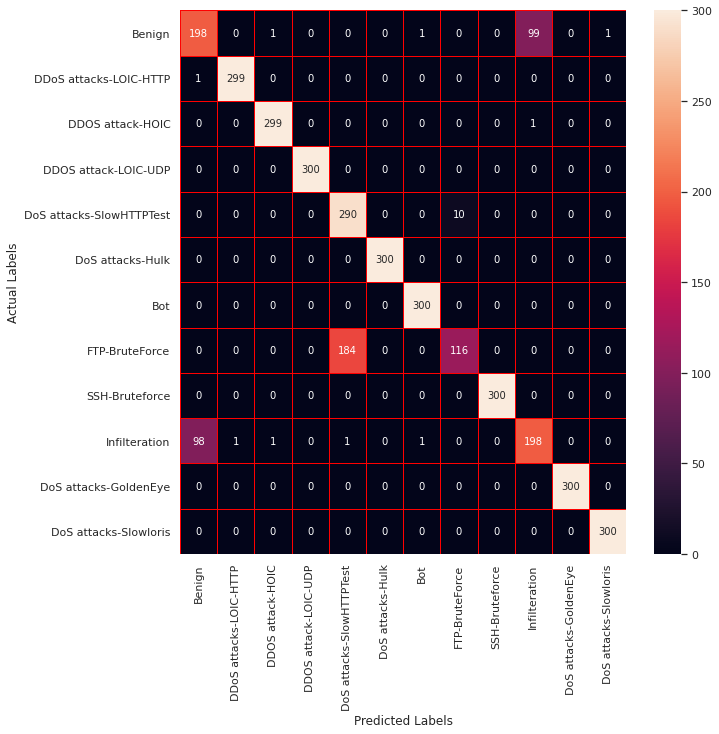

In [6]:
y_pred = pipe.predict(x_test)
utils.get_scores_plots_stats(y_test, y_pred, multiclass_avg='micro', class_labels=classes, figsize=(10,10))